In [48]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np

In [49]:
colors = ['#00bfc4', '#f8766d']
styles = ['-', ':']

In [50]:
output_dir = '../output'

In [51]:
with open('../output/histories.json') as f:
    data = json.load(f)

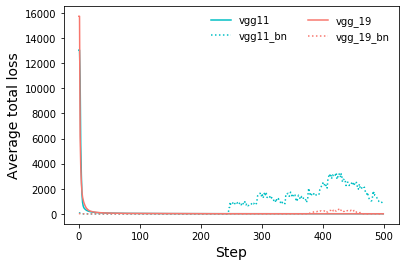

In [52]:
step = 500
for i, (k1, v1) in enumerate(data.items()):
    n = len(data[k1])
    avg_score = np.zeros(step)
    for k2, v2 in data[k1].items():
        style_score = np.array(v2[1])[:step]
        content_score = np.array(v2[2])[:step]
        avg_score +=  style_score + content_score
#         if np.any((style_score + content_score)[300:] > 1000):
#             print(k1, k2)
    plt.plot(np.arange(step), avg_score/n, label=k1, color=colors[int(i/2)], ls=styles[int(i%2)])
plt.xlabel('Step', fontsize=14)
plt.ylabel('Average total loss', fontsize=14)
plt.legend(frameon=False, ncol=2)
plt.savefig(os.path.join(output_dir, 'avg_total_loss_history'), bbox_inches="tight")

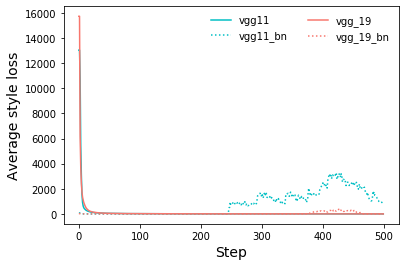

In [53]:
for i, (k1, v1) in enumerate(data.items()):
    n = len(data[k1])
    avg_score = np.zeros(step)
    for k2, v2 in data[k1].items():
        style_score = np.array(v2[1])[:step]
        content_score = np.array(v2[2])[:step]
        avg_score +=  style_score
    plt.plot(np.arange(step), avg_score/n, label=k1, color=colors[int(i/2)], ls=styles[int(i%2)])
plt.xlabel('Step', fontsize=14)
plt.ylabel('Average style loss', fontsize=14)
plt.legend(frameon=False, ncol=2)
plt.savefig(os.path.join(output_dir, 'avg_style_loss_history'), bbox_inches="tight")

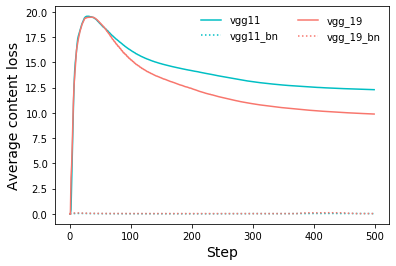

In [54]:
for i, (k1, v1) in enumerate(data.items()):
    n = len(data[k1])
    avg_score = np.zeros(step)
    for k2, v2 in data[k1].items():
        style_score = np.array(v2[1])[:step]
        content_score = np.array(v2[2])[:step]
        avg_score +=  content_score
    plt.plot(np.arange(step), avg_score/n, label=k1, color=colors[int(i/2)], ls=styles[int(i%2)])
plt.xlabel('Step', fontsize=14)
plt.ylabel('Average content loss', fontsize=14)
plt.legend(frameon=False, ncol=2)
plt.savefig(os.path.join(output_dir, 'avg_content_loss_history'), bbox_inches="tight")

In [108]:
from PIL import Image

In [152]:
def iterate_images(dir: str) -> list:
    image_paths = []
    for filename in os.listdir(dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            path = os.path.join(dir, filename)
            image_paths.append(path)
    return image_paths

def get_filename(s:str):
    return s.split('/')[-1].replace('.png', '').replace('.jpg', '')

In [153]:
subdirs = ['vgg11', 'vgg19', 'vgg11_bn', 'vgg19_bn', 'resnet18']

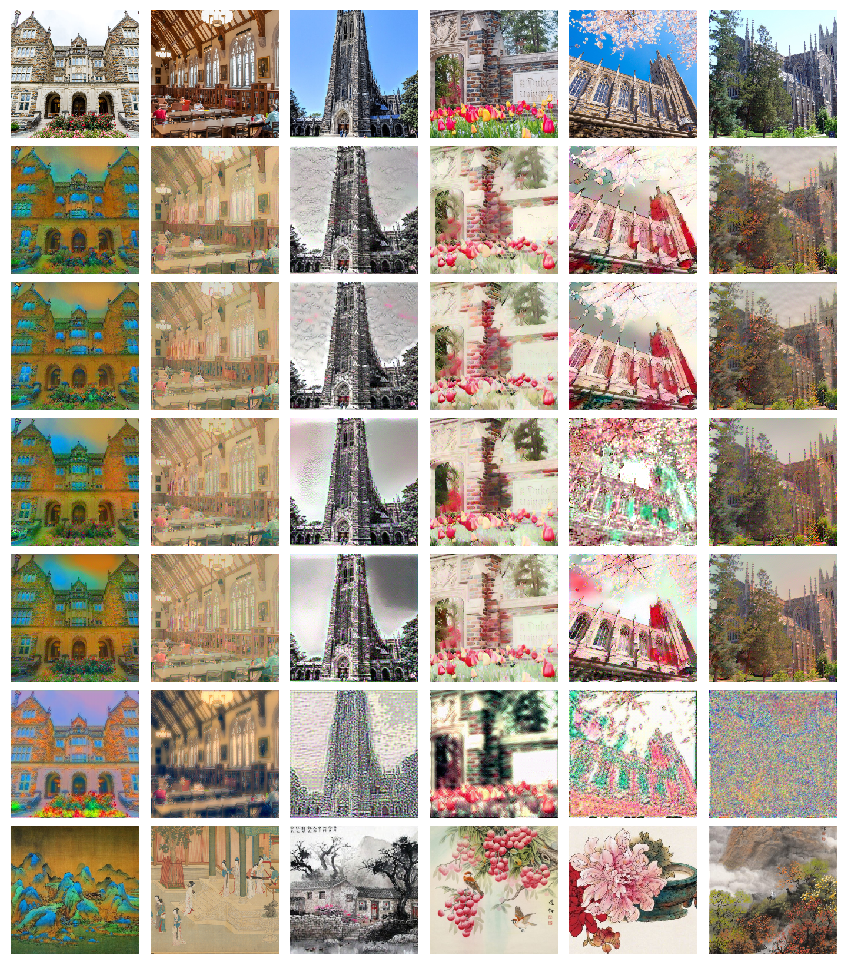

In [227]:
combinations = [get_filename(img_dir) for img_dir in iterate_images(os.path.join(output_dir, subdirs[0]))]
# selected_content_images = [get_filename(img_dir) for img_dir in iterate_images('../selected/content_images')]
# selected_style_images = [get_filename(img_dir) for img_dir in iterate_images('../selected/style_images')]
# sampled_contents = np.random.choice(selected_content_images, cols, replace=False)
# sampled_styles = np.random.choice(selected_style_images, cols, replace=False)
# selected_combinations = [c + '+' + s for c, s in zip(sampled_contents, sampled_styles)]
selected_combinations = [
    'duke old chemistry building+千里江山图',
    'duke library2+汉宫春晓图',
    'duke chapel+赵景岩农村水墨画',
    'duke gate +赵逸梅 - 清趣',
    'duke building3+郑乃珖-青铜百花',
    'duke building2+孙九江2'
    
]
cols = len(selected_combinations)
rows = len(subdirs) + 2

pairs = [c.split('+') for c in selected_combinations]
contents, styles = [x[0] for x in pairs], [x[1] for x in pairs]

w = 15
f, axes = plt.subplots(rows, cols, figsize=(w, w*rows/cols))
for i, d in enumerate(contents):
    im = Image.open(f'../data_in_net/content_images/{d}.png')
    axes[0,i].imshow(im)
    axes[0,i].axis('off')

for i, s in enumerate(selected_combinations, start=0):
    for k, d in enumerate(subdirs, start=1):
        image_path = iterate_images(os.path.join(output_dir, d))
        image_names = [get_filename(img) for img in image_path]
        for j, name in enumerate(image_names):
            if name == s:
                im = Image.open(image_path[j])
                axes[k, i].imshow(im)
                if not i:
                    axes[k, i].set_ylabel(f'{d}')
                axes[k, i].axis('off')
                axes[k, i].set_aspect('equal')
for i, d in enumerate(styles):
    im = Image.open(f'../data_in_net/style_images/{d}.png')
    axes[-1,i].imshow(im)
    axes[-1,i].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(os.path.join(output_dir, 'samples'), bbox_inches='tight', pad_inches=0)
# plt.tight_layout()